# Chapter 3: Recursion

- You learn about recursion. Recursion is a coding technique used in many algorithms. It’s a building block for understanding later chapters in this book.
- You learn how to break a problem down into a base case and a recursive case. The divide-andconquer strategy (chapter 4) uses this simple concept to solve hard problems.

## Recursion

Suppose you’re digging through your grandma’s attic and come across a mysterious locked suitcase.

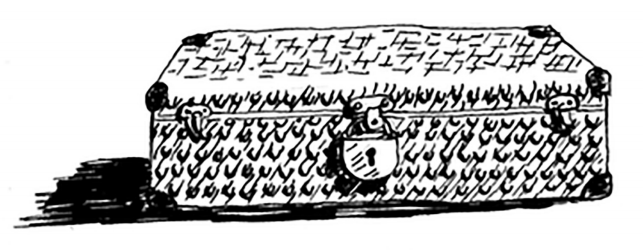

Grandma tells you that the key for the suitcase is probably in this other box.

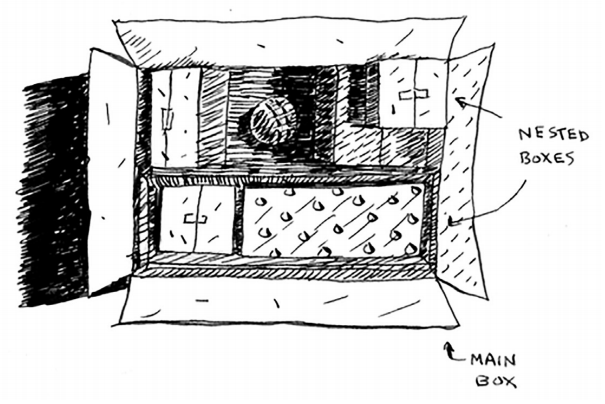

This box contains more boxes, with more boxes inside those boxes. The key is in a box somewhere. What’s your algorithm to search for the key?
Think of an algorithm before you read on.

### Approach 1

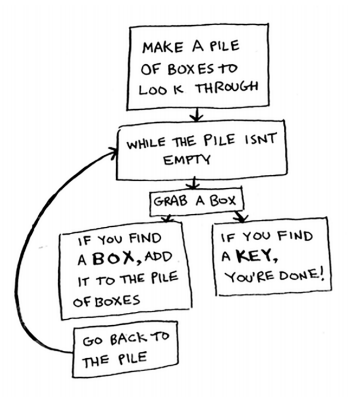

1. Make a pile of boxes to look through.
2. Grab a box, and look through it.
3. If you find a box, add it to the pile to look through later.
4. If you find a key, you’re done!
5. Repeat.

The first approach uses a while loop. While the pile isn’t empty, grab a box and look through it:

In [1]:
def look_for_key(main_box):
    pile = main_box.make_a_pile_to_look_through()
    while pile is not empty:
        box = pile.grab_a_box()
        for item in box:
            if item.is_a_box():
                pile.append(item)
            elif item.is_a_key():
                print("found the key!")

### Approach 2

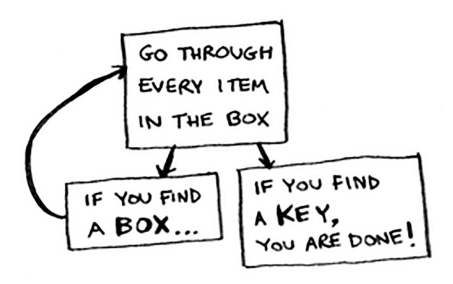

1. Look through the box.
2. If you find a box, go to step 1.
3. If you find a key, you’re done!

The second way uses recursion. Recursion is where a function calls itself.
Here’s the second way in pseudocode:

In [2]:
def look_for_key(box):
    for item in box:
        if item.is_a_box():
            look_for_key(item)    # Recursion!
        elif item.is_a_key():
            print("found the key!")

Loops may perform better in most cases; use recursion to make program understandable
> I like this quote by Leigh Caldwell on Stack Overflow: “Loops may achieve a performance gain for your program. Recursion may achieve a performance gain for your programmer. Choose which is more important in your situation!”

Many important algorithms use recursion, so it’s important to understand the concept.

## Base case and recursive case

Because a recursive function calls itself, it’s easy to write a function incorrectly that ends up in  in infinite loop. For example, suppose you want to write a function that prints a countdown, like this:
> 3...2...1

You can write it recursively, like so:

In [5]:
def countdown(i):
    print(i)
    countdown(i-1)

In [ ]:
# Test
countdown(3)

3
2
1
0
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-63
-64
-65
-66
-67
-68
-69
-70
-71
-72
-73
-74
-75
-76
-77
-78
-79
-80
-81
-82
-83
-84
-85
-86
-87
-88
-89
-90
-91
-92
-93
-94
-95
-96
-97
-98
-99
-100
-101
-102
-103
-104
-105
-106
-107
-108
-109
-110
-111
-112
-113
-114
-115
-116
-117
-118
-119
-120
-121
-122
-123
-124
-125
-126
-127
-128
-129
-130
-131
-132
-133
-134
-135
-136
-137
-138
-139
-140
-141
-142
-143
-144
-145
-146
-147
-148
-149
-150
-151
-152
-153
-154
-155
-156
-157
-158
-159
-160
-161
-162
-163
-164
-165
-166
-167
-168
-169
-170
-171
-172
-173
-174
-175
-176
-177
-178
-179
-180
-181
-182
-183
-184
-185
-186
-187
-188
-189
-190
-191
-192
-193
-194
-195
-196
-197
-198
-199
-200
-201
-202
-203
-204
-205
-206
-207
-208
-209
-210
-211
-212
-213
-214
-215
-216
-217
-218
-219
-220


You’ll notice a problem: this function will run forever!
> 3...2...1...0...-1...-2...
(Press Ctrl-C to kill your script.)

When you write a recursive function, you have to tell it when to stop recursing. That’s why every recursive function has two parts: the base case, and the recursive case. The recursive case is when the function calls itself. The base case is when the function doesn’t call itself again … so it doesn’t go into an infinite loop. Let’s add a base case to the countdown function:

In [1]:
def countdown(i):
    print(i)
    if i <= 0:     # Base case
        return
    else:          # Recursive case
        countdown(i-1)

In [2]:
# Test
countdown(3)

3
2
1
0


Now the function works as expected. It goes something like this.

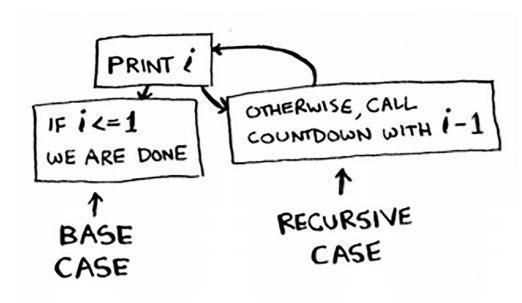

## The stack

The call stack is an important concept in general programming, and it’s also important to understand
when using recursion.
Suppose you’re throwing a barbecue. You keep a todo list for thebarbecue, in the form of a stack of sticky notes.

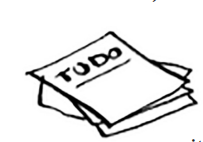

Remember back when we talked about arrays and lists, and you had a todo list? You could add todo items
anywhere to the list or delete random items. The stack of sticky notes is much simpler. When you insert an item, it gets added to the top of the list. When you read an item, you only read the topmost item, and it’s taken off the list. So your todo list has only two actions: push (insert) and pop (remove and read).

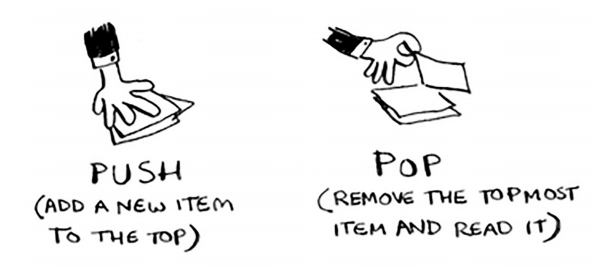

Let’s see the todo list in action.

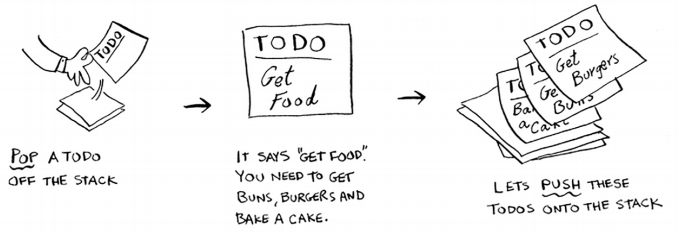

This data structure is called a stack. The stack is a simple data structure.
You’ve been using a stack this whole time without realizing it!

### The call stack

Your computer uses a stack internally called the call stack. Let’s see it in action. Here’s a simple function:

In [4]:
def greet(name):
    print("hello, " + name + "!")
    greet2(name)
    print("getting ready to say bye...")
    bye()

This function greets you and then calls two other functions. Here are those two functions:

In [5]:
def greet2(name):
    print("how are you, " + name + "?")

def bye():
    print ("ok bye!")

Let’s walk through what happens when you call a function.

> *print* is a function in Python, but to make things easier for this example, we’re pretending it isn’t. Just play along.

Suppose you call greet(“maggie”). First, your computer allocates a box of memory for that function call.

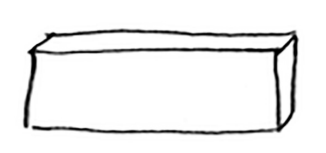

Now let’s use the memory. The variable name is set to “maggie”. That needs to be saved in memory.

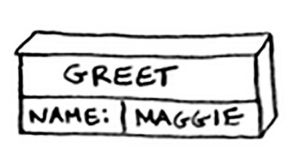

Every time you make a function call, your computer saves the values for all the variables for that call in memory like this. Next, you print hello, maggie! Then you call greet2(“maggie”). Again, your computer allocates a box of memory for this function call.

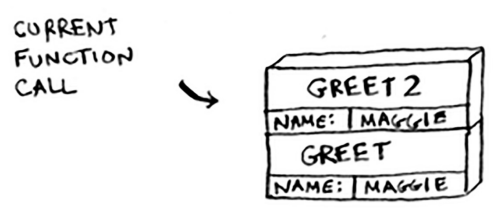

Your computer is using a stack for these boxes. The second box is added on top of the first one. You print how are you, maggie? Then you return from the function call. When this happens, the box on top of the stack gets popped off.

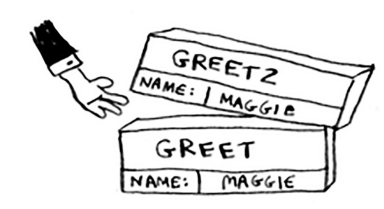

Now the topmost box on the stack is for the greet function, which means you returned back to the greet function. When you called the greet2 function, the greet function was partially completed. This is the big idea behind this section: when you call a function from another function, the calling function is paused in a partially completed state. All the values of the variables for that function are still stored in memory. Now that you’re done with the greet2 function, you’re back to the greet function, and you pick up where you left off. First you print getting ready to say bye…. You call the bye function.

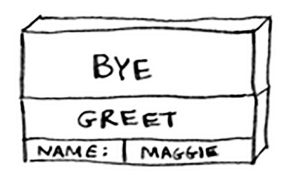

A box for that function is added to the top of the stack. Then you print ok bye! and return from the function call.

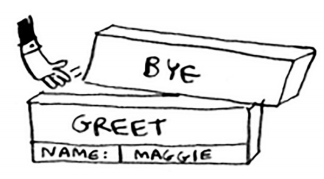

And you’re back to the greet function. There’s nothing else to be done, so you return from the greet function too. This stack, used to save the variables for multiple functions, is called the call stack.

### Exercises

#### 3.1 Suppose I show you a call stack like this.

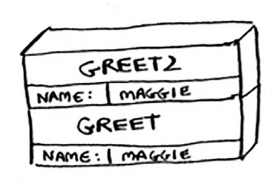

What information can you give me, just based on this call stack?

**Answer**
Here are some things you could tell me:
- The greet function is called first, with name = maggie.
- Then the greet function calls the greet2 function, with name = maggie.
- At this point, the greet function is in an incomplete, suspended state.
- The current function call is the greet2 function.
- After this function call completes, the greet function will resume.

### The call stack with recursion

Recursive functions use the call stack too! Let’s look at this in action with the factorial function. factorial(5) is written as 5!, and it’s defined like this: 5! = 5 * 4 * 3 * 2 * 1. Similarly, factorial(3) is 3 * 2 * 1. Here’s a recursive function to calculate the factorial of a number:

In [6]:
def fact(x):
    if x == 1:
        return 1
    else:
        return x * fact(x - 1)

In [7]:
# Test
fact(3)

6

Now you call fact(3). Let’s step through this call line by line and see how the stack changes.  Remember, the topmost box in the stack tells you what call to fact you’re currently on.

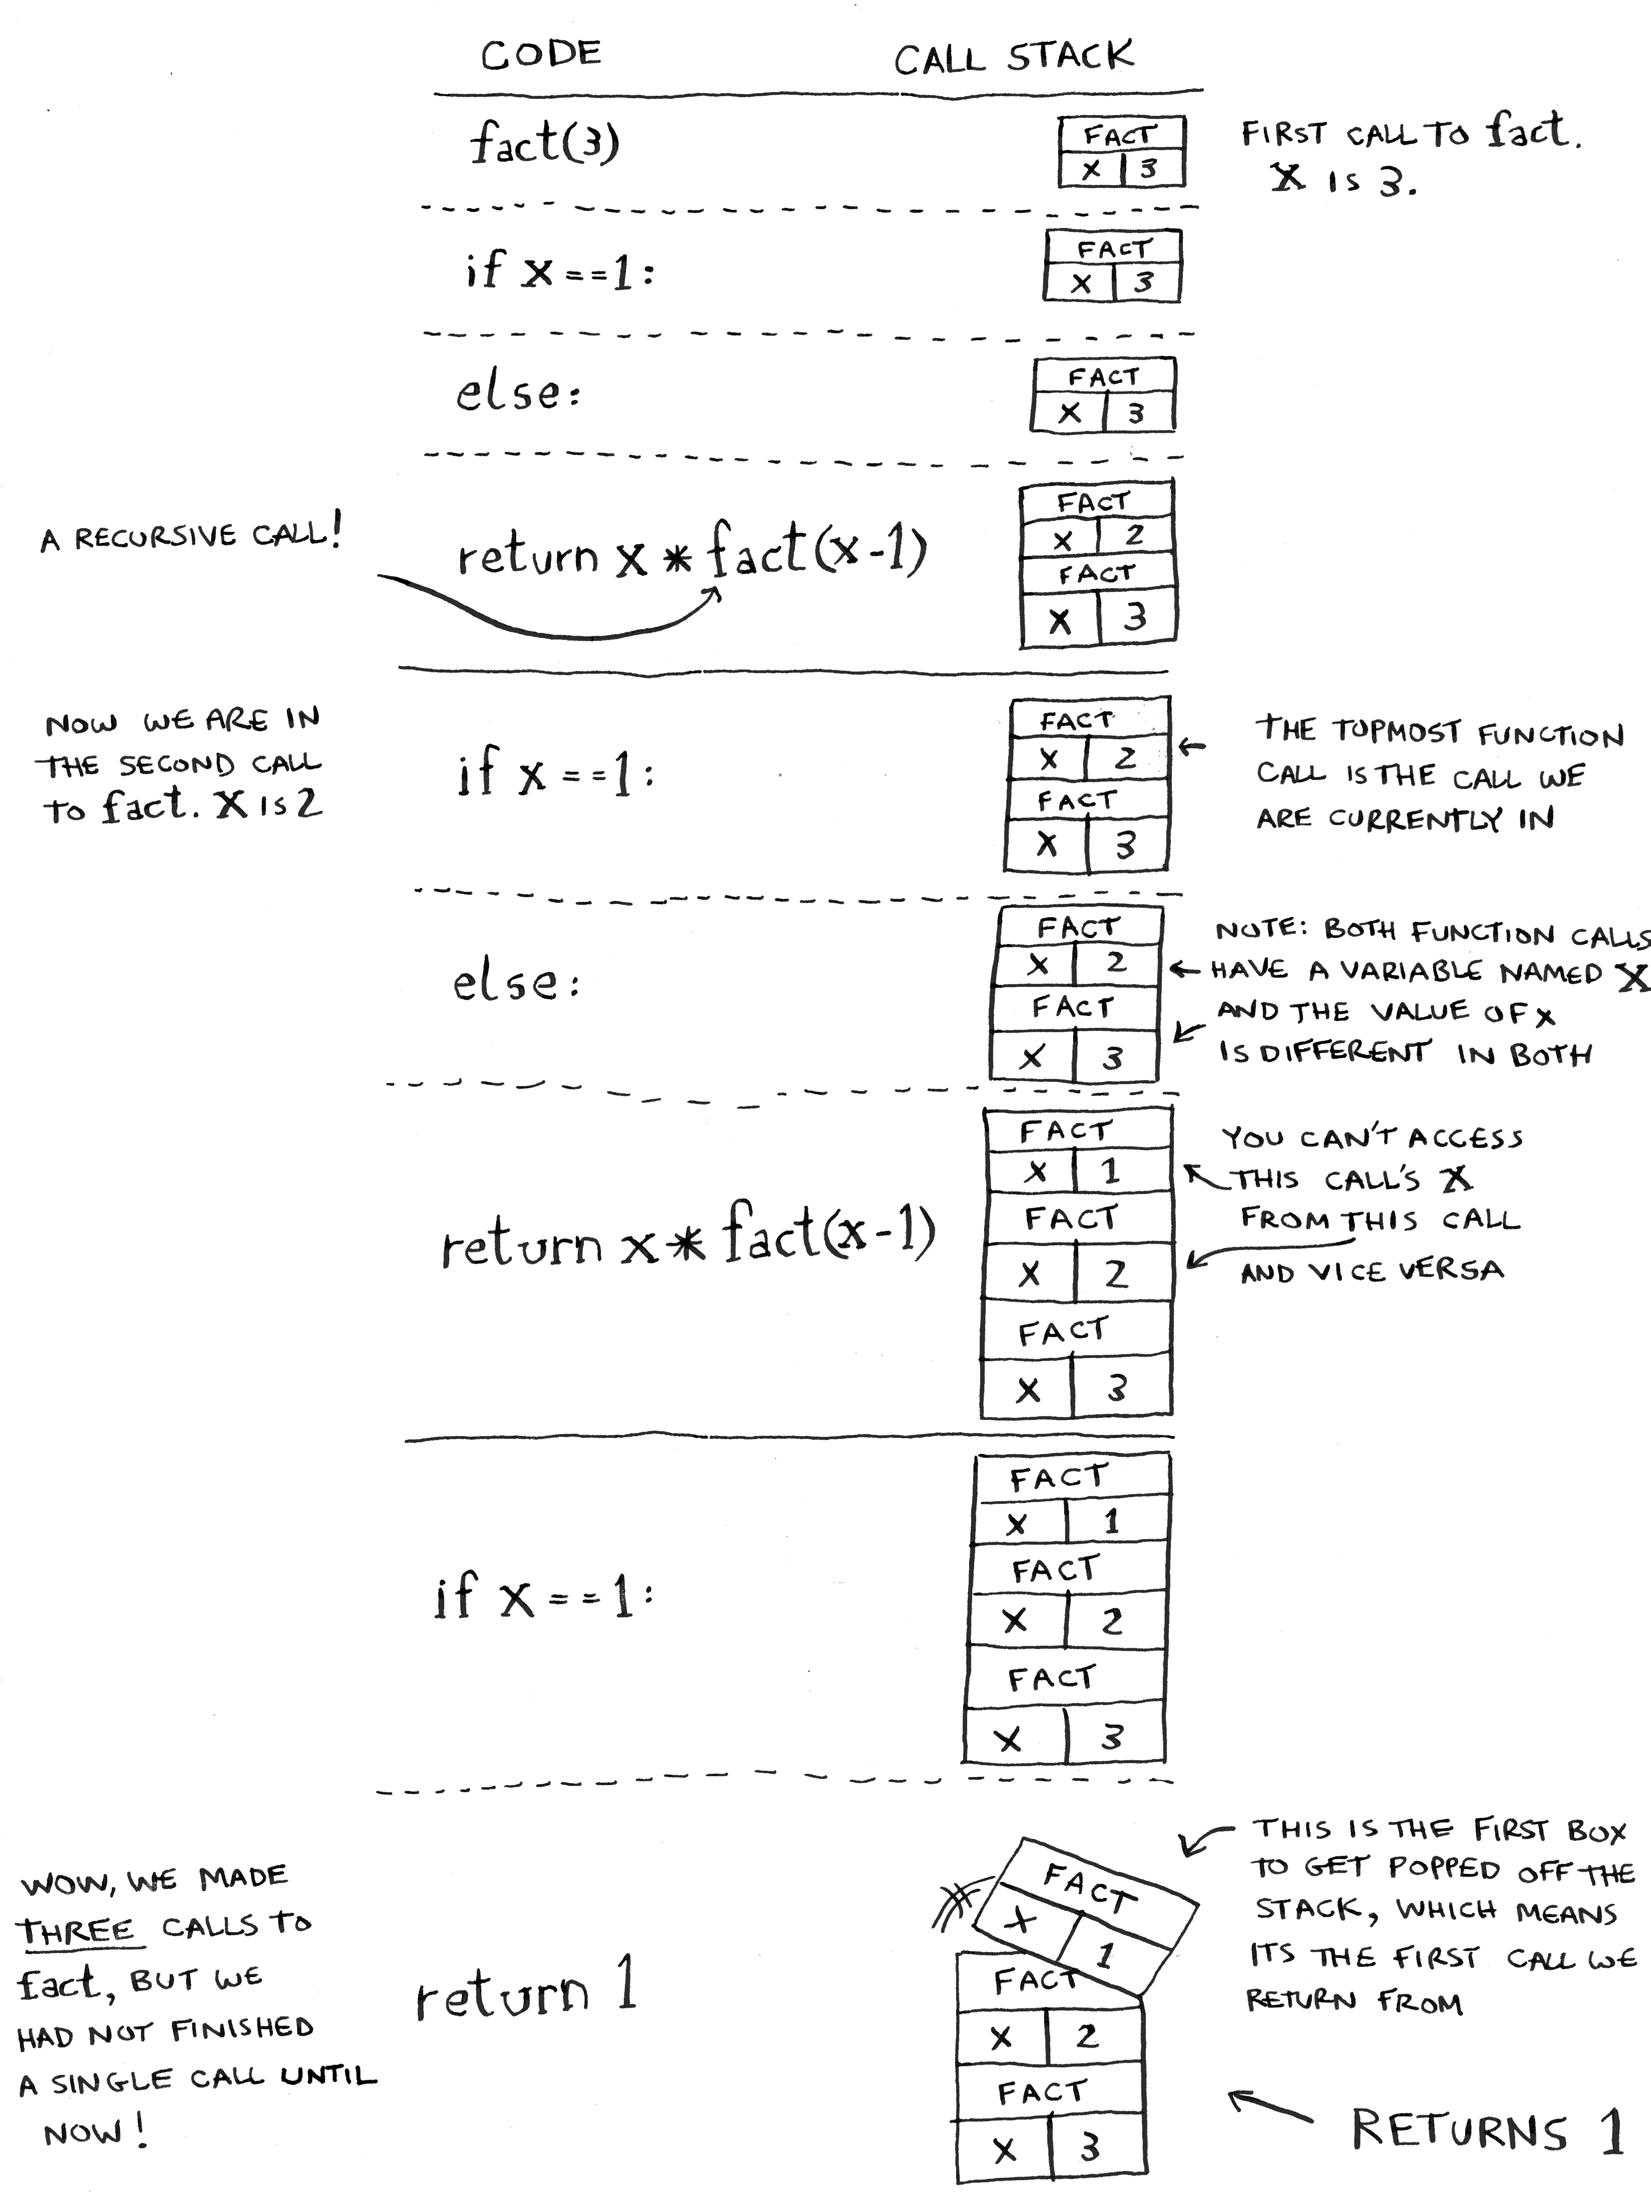

Notice that each call to fact has its own copy of x. You can’t access a different function’s copy of x.

The stack plays a big part in recursion. In the opening example, there were two approaches to find the key. Here’s the first way again.

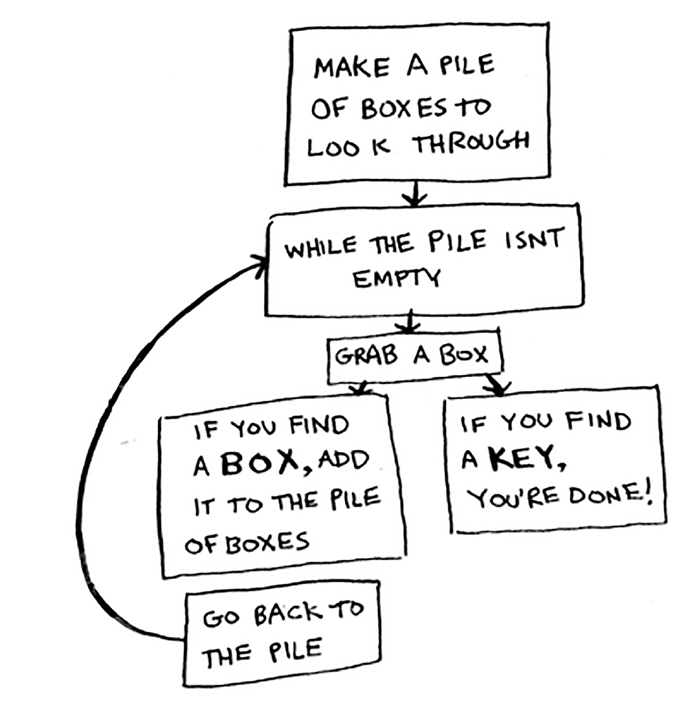

This way, you make a pile of boxes to search through, so you always know what boxes you still need to search.

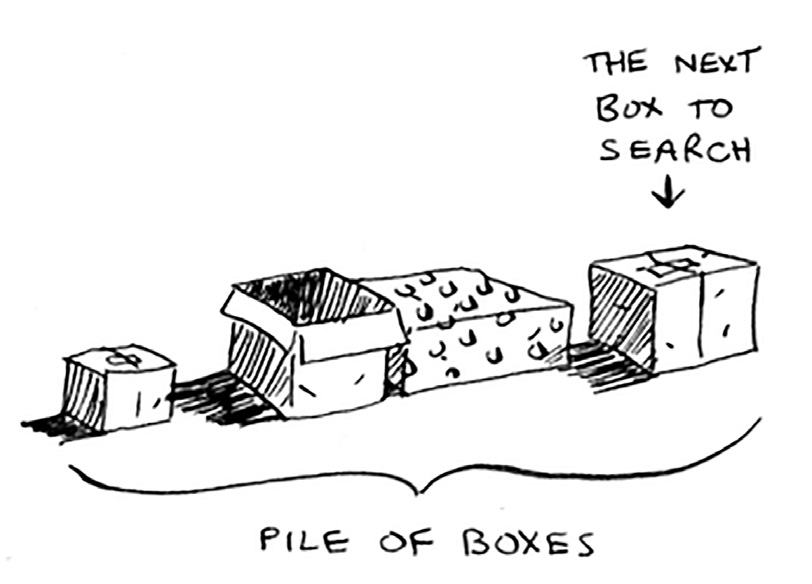

But in the recursive approach, there’s no pile.

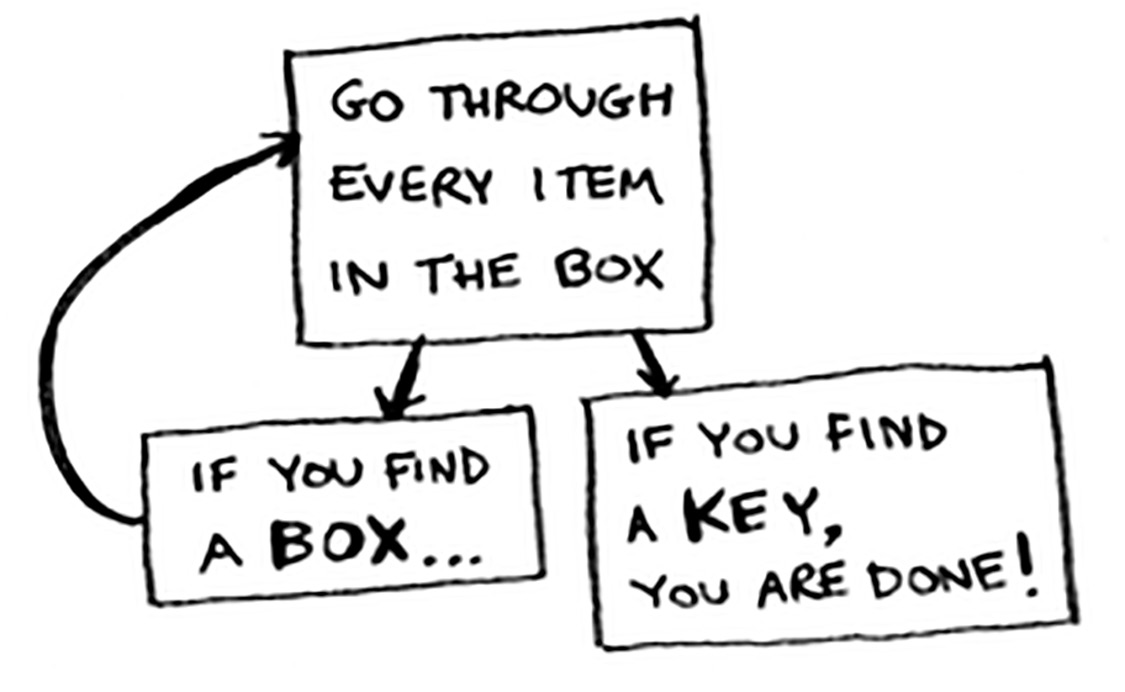

If there’s no pile, how does your algorithm know what boxes you still have to look through? Here’s an example.

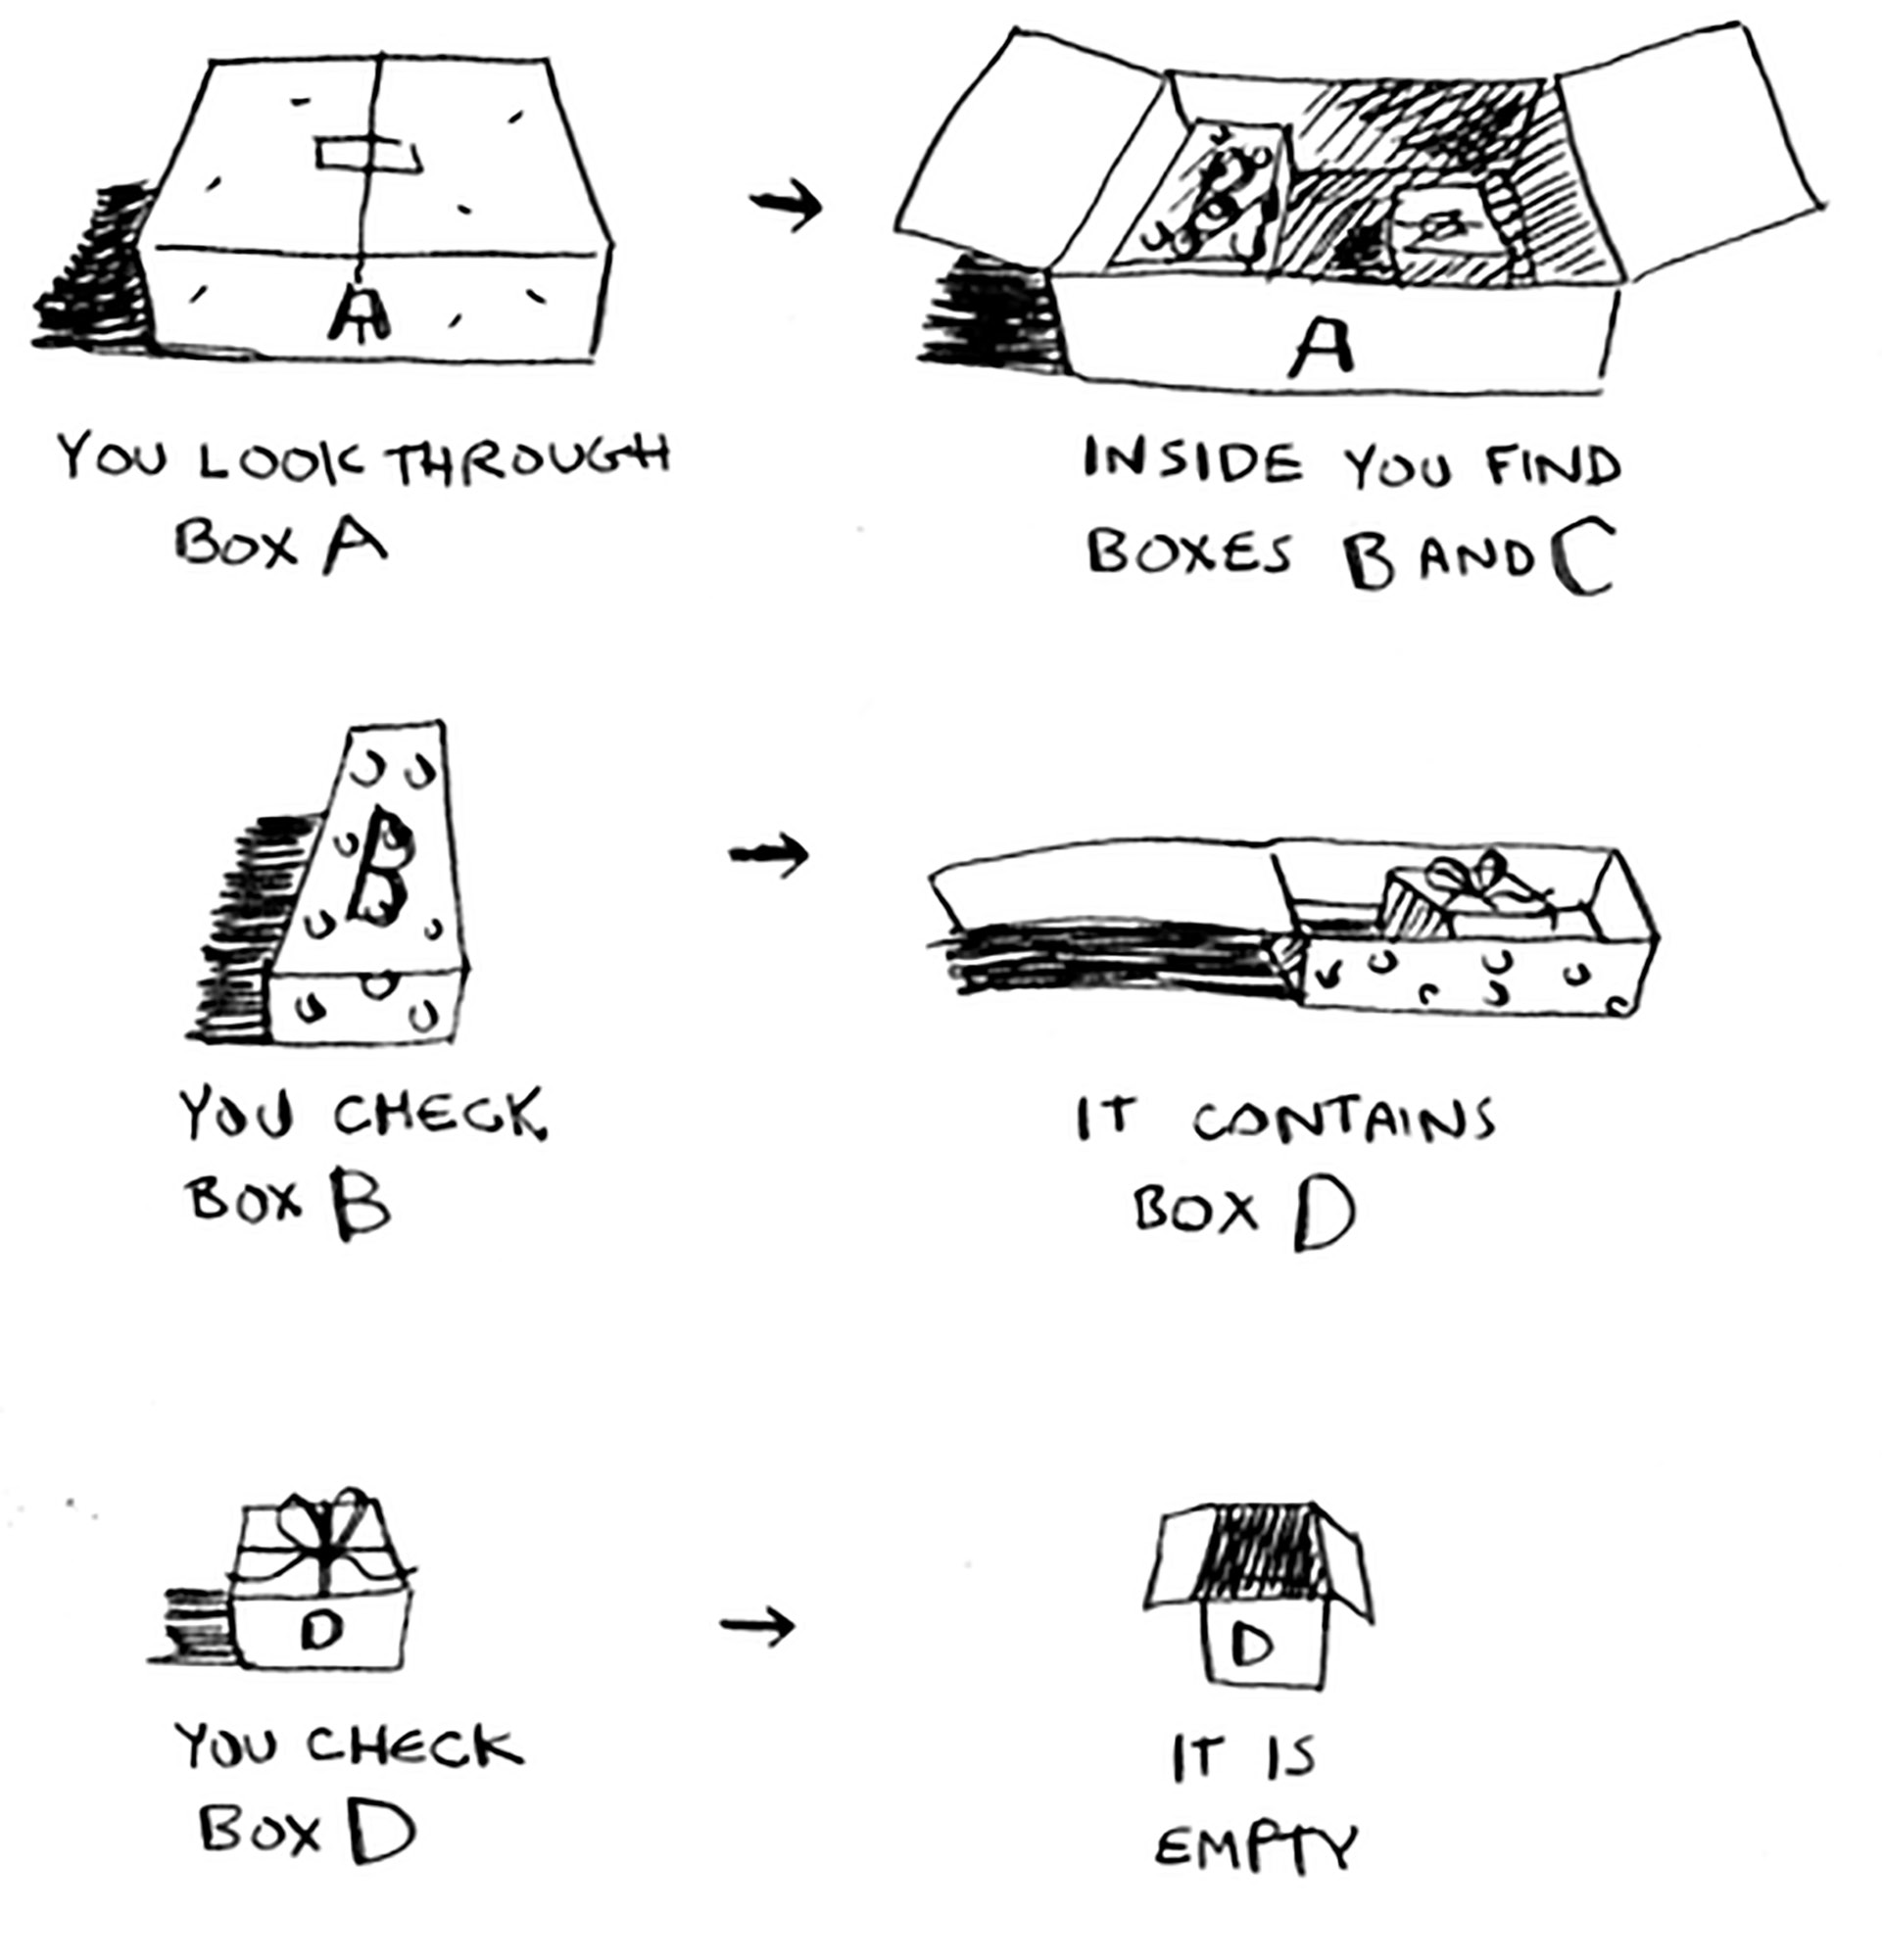

At this point, the call stack looks like this.

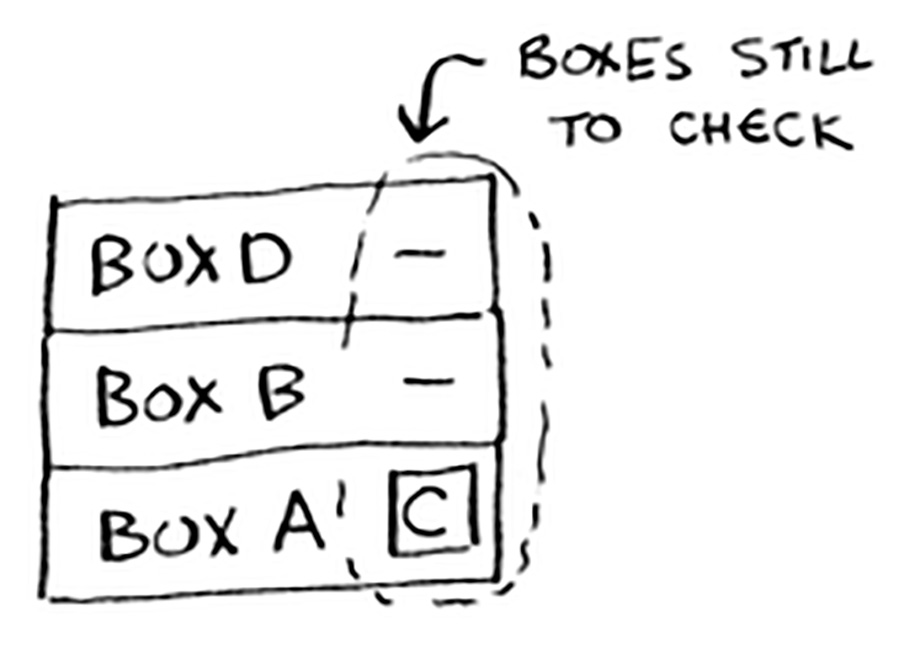

The “pile of boxes” is saved on the stack! This is a stack of halfcompleted function calls, each with its own half-complete list of boxes to look through. Using the stack is convenient because you don’t have to keep track of a pile of boxes yourself—the stack does it for you.
Using the stack is convenient, but there’s a cost: saving all that info can take up a lot of memory. Each of those function calls takes up some memory, and when your stack is too tall, that means your computer is saving information for many function calls. At that point, you have two options:
- You can rewrite your code to use a loop instead.
- You can use something called tail recursion. That’s an advanced recursion topic that is out of the scope of this book. It’s also only supported by some languages, not all.

### Exercises

#### 3.2 Suppose you accidentally write a recursive function that runs forever. As you saw, your computer allocates memory on the stack for each function call. What happens to the stack when your recursive function runs forever?

**Answer**
The stack grows forever. Each program has a limited amount of space on the call stack. When your program runs out of space (which it eventually will), it will exit with a stackoverflow error.

## Recap

- Recursion is when a function calls itself.
- Every recursive function has two cases: the base case and the recursive case.
- A stack has two operations: push and pop.
- All function calls go onto the call stack.
- The call stack can get very large, which takes up a lot of memory.